In [121]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from aed import histbox, tabela_frequencias, limites_discrepantes, tabela_descritiva
import warnings

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

__Sumário__:
1. [Introdução](#Introdução)
2. [Análise de Perfil](#Análise-de-Perfil)
    1. [Idade](#Idade)
    2. [Gênero e Prática de Basquete](#Gênero-e-Prática-de-Basquete)
4. [Audiência, Plataforma Favorita, Apostas e NBB](#Audiência,-Plataforma-Preferida,-Apostas-e-NBB)
    1. [Partidas assistidas por semana](#Partidas-assistidas-por-semana)
    2. [Plataforma Favorita](#Plataforma-Favorita)
    3. [Apostas](#Apostas)
    4. [NBB](#NBB)
6. [Popularidade dos times e dos jogadores](#Popularidade-dos-times-e-jogadores)
    1. [Time com mais torcedores](#Time-com-mais-torcedores)
    2. [Jogador mais popular](#Jogador-mais-popular)
    3. [O Maior da História 🐐](#O-maior-da-História-🐐)
7. [Conclusão](#Conclusão)

# Análise Exploratória de Dados sobre a NBA no Brasil
Herian Cavalcante - Bach. Ciências Matemáticas e da Terra<br>
Antonio Carlos Brito - Bach. Ciências Matemáticas e da Terra

__Resumo__: Análise dos resultados da pesquisa sobre a NBA no Brasil. As respostas foram obtidas através de formulário online utilizando a plataforma _Google Forms_. A divulgação do formulário se deu através de amigos e em comunidades de basquete na Internet.

# Introdução
A NBA (National Basketball Association) é a principal liga de basquete profissional dos Estados Unidos e é considerada a principal liga de basquete do mundo. Fundada em 6 de junho de 1946 como a Basketball Association of America (BAA), a liga foi renomeada para NBA em 1949 após a fusão com a National Basketball League (NBL).  A liga é conhecida por seus jogadores talentosos e influentes, incluindo lendas como Michael Jordan, Magic Johnson, Larry Bird, Kobe Bryant, Shaquille O'Neal, LeBron James e muitos outros. Além disso, a NBA tem uma grande influência cultural e social, tendo expandido seu alcance globalmente, com jogos transmitidos em mais de 200 países e territórios.
A NBA também é reconhecida por suas iniciativas de responsabilidade social, como a NBA Cares, e por sua contribuição para o desenvolvimento do basquete em nível juvenil e comunitário. A liga tem sede em Nova York, e seu comissário atual é Adam Silver, que assumiu o cargo em 2014.

No Brasil, a NBA parece estar crescendo sua base de fãs e esta pesquisa buscou analisar a influência da liga no país e o perfil de seus espectadores. 



<center>
<center><img src='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbDcxbWd3Zmo1Njdndm1yOXV6Z2M3bjh6MXp1aXN0NXRnbXpsY2hncCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/gDOtwyz26z8lmKqMfT/giphy.gif' width='500px'></center>
</center>

<center><font size='1'>Gui Santos, ala brasileiro do Golden State Warriors</font></center>

Perguntas feitas no formulário:
- Qual a sua idade?
- Sexo (Masculino, Feminino, Outro)
- Qual a sua equipe favorita?
- Quantidade de jogos que você costuma assistir durante a semana
- Qual a sua plataforma favorita para assistir os jogos?
- Qual o seu jogador favorito em atividade?
- Para você quem é o maior atleta da história da NBA?
- Você costuma jogar basquete casualmente ou profissionalmente?
- Você costuma apostar em partidas da NBA?
- Caso aposte, quanto você costuma apostar em média por mês?
- Você acompanha a liga nacional de basquete do Brasil (NBB)?

As variáveis de interesse podem ser divididas entre:
- __Qualitativas__: Gênero, equipe favorita, plataforma favorita, jogador favorito em atividade, pratica de basquete, costume de apostar em partidas da NBA, acompanha a NBB
- __Quantitativas__: Idade dos respondentes, quantidade de jogos assitidos por semana, aposta média realizada por mês.

# Tratamento e Limpeza dos Dados

In [122]:
nba = pd.read_csv('./resultados.csv')

In [123]:
# Retirando a coluna de data/hora
nba.drop(columns=['Carimbo de data/hora'], inplace=True)

In [124]:
# Renomeando as colunas para facilitar a manipulação
nba.rename(columns=
           {'Qual a sua idade?':'idade',
            'Sexo':'sexo',
            'Qual a sua equipe favorita?':'equipe',
            'Qual o seu jogador favorito em atividade? ':'jogador_fav',
            'Qual a sua plataforma favorita para assistir os jogos?':'plataforma_fav',
            'Quantidade de jogos que você costuma assistir durante a semana':'jogos_assistidos',
            'Para você quem é o maior atleta da história da NBA?':'goat', ## Greatest of all time
            'Você costuma jogar basquete casualmente ou profissionalmente?':'pratica',
            'Você costuma apostar em partidas da NBA?':'aposta',
            'Caso aposte, quanto você costuma apostar em média por mês?':'aposta_mes',
            'Você acompanha a liga nacional de basquete do Brasil (NBB)?':'nbb'
           }, inplace=True)

In [125]:
print(f'O conjunto de dados selecionado tem {nba.shape[0]} linhas e {nba.shape[1]} colunas')

O conjunto de dados selecionado tem 48 linhas e 11 colunas


In [126]:
nba.head()

,idade,sexo,equipe,jogos_assistidos,plataforma_fav,jogador_fav,goat,pratica,aposta,aposta_mes,nbb
0,25,Masculino,Brooklyn Nets,2,ESPN,Trae Young,Michael Jordan,Sim,Sim,"R$ 10,01 a R$ 24,99",Não
1,21,Masculino,Chicago Bulls,5,NBA League Pass,LaMelo Ball,Michael Jordan,Sim,Sim,"Mais de R$ 100,00",Sim
2,22,Masculino,Boston Celtics,4,Prime Video,Jayson Tatum,LeBron James,Sim,Não,NaN,Não
3,24,Masculino,Milwaukee Bucks,2,Prime Video,Giannis Antetokounmpo,LeBron James,Não,Sim,"R$ 10,01 a R$ 24,99",Não
4,20,Masculino,Oklahoma City Thunder,7,ESPN,Outro,Michael Jordan,Não,Sim,"R$ 25,00 a R$ 49,99",Não


In [127]:
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,48.0,23.416667,8.240619,15.0,19.0,22.0,25.0,66.0
jogos_assistidos,48.0,4.833333,14.169691,0.0,1.0,3.0,4.0,100.0


In [128]:
nba['jogos_assistidos'].value_counts()

jogos_assistidos
2      9
4      8
1      7
0      7
5      6
3      6
7      3
100    1
6      1
Name: count, dtype: int64

In [129]:
# Corrigindo o valor discrepante
nba['jogos_assistidos'].loc[nba['jogos_assistidos']== 100] = 10

Há um registro de resposta com 100 jogos assistidos na semana, o que é impossível, tendo em vista que não há essa quantidade de jogos na semana, uma vez que temos 82 jogos na temporada regular inteira. Dessa forma, irei interpretar como um erro de digitação do respondente e irei considerar como 10 (Que já é um número bem alto em comparação ao restante das respostas)

In [130]:
# Mudando a formatação para evitar problemas
nba['aposta_mes'].loc[nba['aposta_mes'] == 'R$ 10,01 a R$ 24,99'] = 'R\$ 10,01 a R\$ 24,99'
nba['aposta_mes'].loc[nba['aposta_mes'] == 'Mais de R$ 100,00'] = 'Mais de R\$ 100,00'
nba['aposta_mes'].loc[nba['aposta_mes'] == 'R$ 25,00 a R$ 49,99'] = 'R\$ 25,00 a R\$ 49,99'
nba['aposta_mes'].loc[nba['aposta_mes'] == 'R$ 50,00 a R$ 74,99'] = 'R\$ 50,00 a R\$ 74,99'
nba['aposta_mes'].loc[nba['aposta_mes'] == 'R$ 75,00 a R$ 100,00'] = 'R\$ 75,00 a R\$ 100,00'

# Análise de Perfil 

Primeiramente, iremos analisar o perfil das pessoas que responderam a pesquisa, focando nas variáveis idade, sexo e se praticam basquete.

## Idade

Analisando a variável idade, encontramos uma dispersão relativamente baixa com 50% dos valores na faixa de 19 a 25 anos (1º e 3º quartil). O valor mais frequente foi 23, a menor idade registrada foi 15 anos e o máximo 66 anos. A média é entre 23 a 24 anos que é relativamente próxima a mediana (22 anos). Além disso, a amostra tem uma assimetria à direita (positiva).

In [131]:
tabela_descritiva(nba, 'idade')

,Tamanho,Moda,Média,Mínimo,1º Q,Mediana,3º Q,Máximo,Variância,Desvio Padrão
Variável,,,,,,,,,,
idade,48,23,23.416667,15,19.0,22.0,25.0,66,67.907801,8.240619


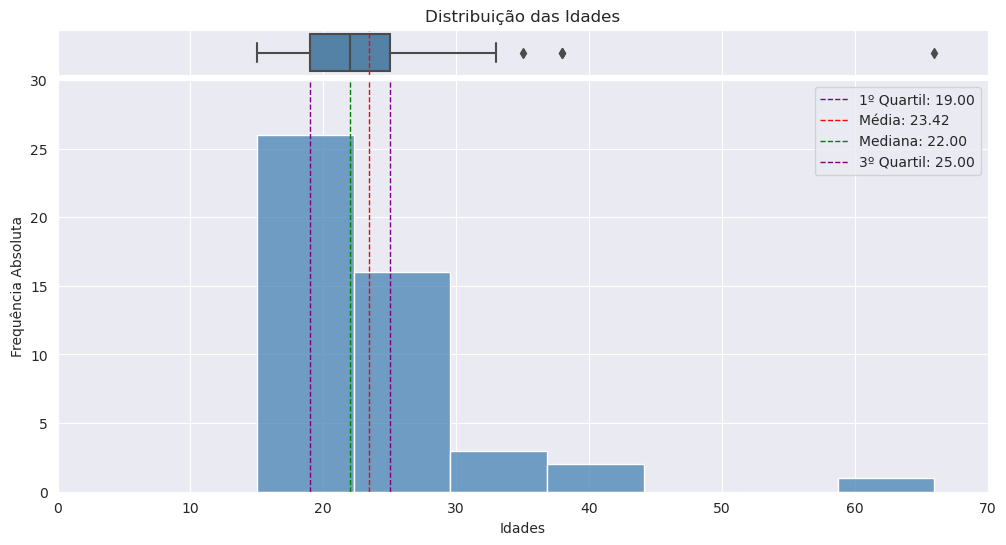

In [132]:
histbox(dados=nba, coluna='idade', title='Distribuição das Idades', xlabel='Idades', ylabel='Frequência Absoluta', size=(12,6), bins=7)
plt.ylim((0,30))
plt.xlim((0,70))
plt.show()

In [133]:
# Obtendo os limites inferior e superior da idade
inferior, superior = limites_discrepantes(nba, 'idade')

print(f'Na variável idade temos que para valores abaixo de {inferior} e acima de {superior} são considerados outliers.')

Na variável idade temos que para valores abaixo de 10.0 e acima de 34.0 são considerados outliers.


Abaixo temos os registros "distoantes" do restante do conjunto de dados.

In [134]:
# Consultando os valores discrepantes
nba.query('idade > 34 or idade < 10')

,idade,sexo,equipe,jogos_assistidos,plataforma_fav,jogador_fav,goat,pratica,aposta,aposta_mes,nbb
21,66,Masculino,Chicago Bulls,0,ESPN,Kevin Durant,Michael Jordan,Não,Não,NaN,Sim
32,35,Masculino,Los Angeles Lakers,0,ESPN,LeBron James,Michael Jordan,Não,Não,NaN,Não
35,38,Masculino,San Antonio Spurs,4,ESPN,Stephen Curry,Michael Jordan,Sim,Sim,"R\$ 75,00 a R\$ 100,00",Não
37,38,Masculino,Golden State Warriors,1,ESPN,LeBron James,Michael Jordan,Não,Não,"R\$ 10,01 a R\$ 24,99",Não


## Gênero e Prática de Basquete

Ao analisar a variável sexo, encontramos uma grande frequência de pessoas do gênero masculino em comparação ao gênero feminino (quase o 4 vezes mais homens). Sobre a pratica do esporte, aproximadamente 60% dos entrevistados responderam que praticam basquete casualmente ou profissionalmente. Um ponto notável e até surpreendente (pelo menos para nós) é a proporção entre o gênero feminino. 

In [135]:
tabela_frequencias(nba, 'sexo')

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
sexo,,,,
Masculino,38,0.791667,38,0.791667
Feminino,10,0.208333,48,1.000000


In [136]:
tabela_frequencias(nba, 'pratica')

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
pratica,,,,
Não,29,0.604167,29,0.604167
Sim,19,0.395833,48,1.000000


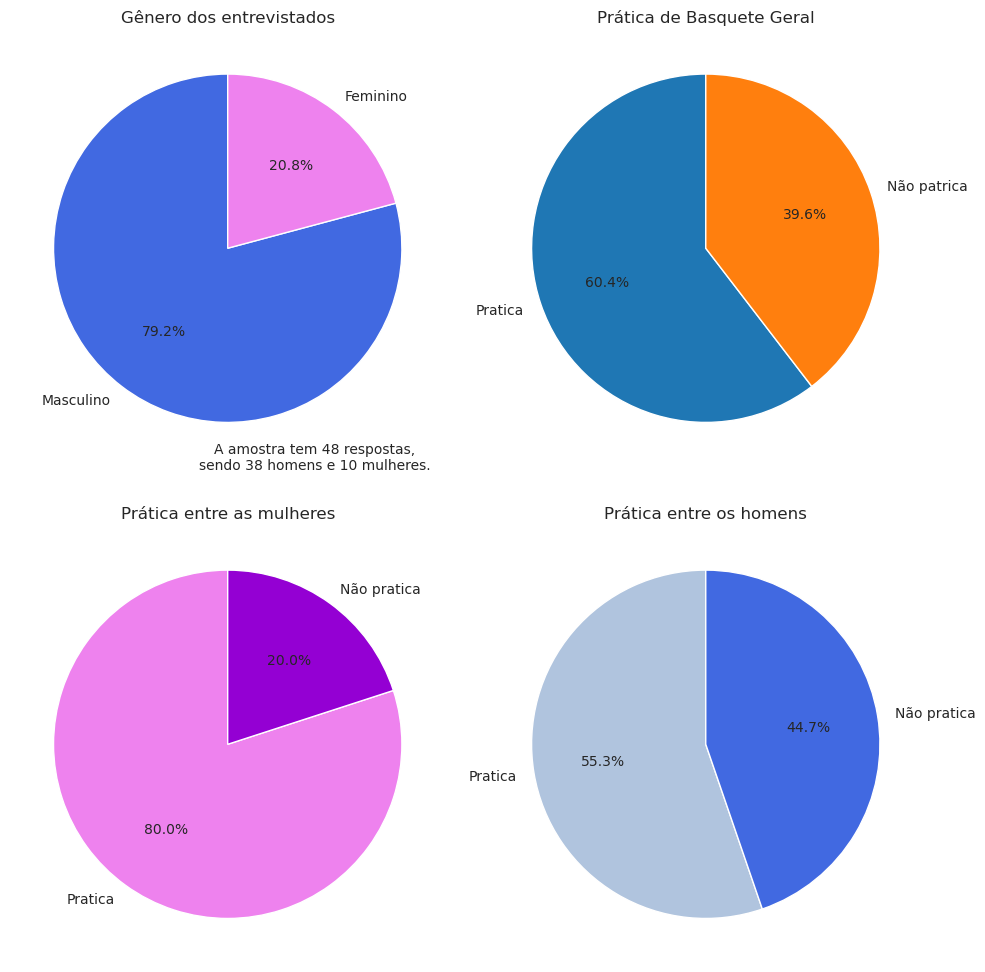

In [137]:
# Respostas entre os gêneros
freq_fem = nba.query('sexo == "Feminino"')['pratica'].value_counts()
freq_masc = nba.query('sexo == "Masculino"')['pratica'].value_counts()
texto = f'A amostra tem 48 respostas,\nsendo 38 homens e 10 mulheres.'

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), gridspec_kw={'height_ratios': (0.5, 0.5)})

# Pratica Geral
axs[0,1].pie(nba['pratica'].value_counts(), labels=['Pratica', 'Não patrica'], autopct='%1.1f%%', startangle=90)
axs[0,1].set_title('Prática de Basquete Geral')

# Pratica entre as mulheres 
axs[1][0].pie(freq_fem, labels=['Pratica', 'Não pratica'], autopct='%1.1f%%', startangle=90, colors=['violet', 'darkviolet'])
axs[1][0].set_title('Prática entre as mulheres')

# Pratica entre os homens
axs[1][1].pie(freq_masc, labels=['Pratica', 'Não pratica'], autopct='%1.1f%%', startangle=90, colors=['lightsteelblue', 'royalblue'])
axs[1][1].set_title('Prática entre os homens')

# Gênero dos entrevistados
axs[0, 0].pie(nba['sexo'].value_counts(), labels=nba['sexo'].unique(), autopct='%1.1f%%', startangle=90, colors=['royalblue', 'violet'])
axs[0, 0].set_title('Gênero dos entrevistados')

axs[0,0].text(0.5, -1.2, texto, ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.show()

# Audiência, Plataforma Preferida, Apostas e NBB

Agora iremos a analisar a audiência da NBA entre as pessoas entrevistas. Analisaremos a quantidade de partidas assistidas por semana, plataforma favorita para assistir aos jogos, se costumam apostar e se acompanham a liga de basquete do Brasil. 

## Partidas assistidas por semana
Há uma grande ocorrência de pessoas que não assistem a nenhum jogo (7), porém a maior parte da amostra assiste a pelo menos um jogo, sendo a média entre 2 a 3 jogos por semana e o máximo 10 jogos.

In [138]:
tabela_descritiva(nba, 'jogos_assistidos')

,Tamanho,Moda,Média,Mínimo,1º Q,Mediana,3º Q,Máximo,Variância,Desvio Padrão
Variável,,,,,,,,,,
jogos_assistidos,48,2,2.958333,0,1.0,3.0,4.0,10,5.062057,2.249901


In [139]:
inferior, superior = limites_discrepantes(nba, 'jogos_assistidos')

print(f'Na variável jogos assistidos temos que para valores abaixo de {inferior} e acima de {superior} são considerados outliers.')

Na variável jogos assistidos temos que para valores abaixo de -3.5 e acima de 8.5 são considerados outliers.


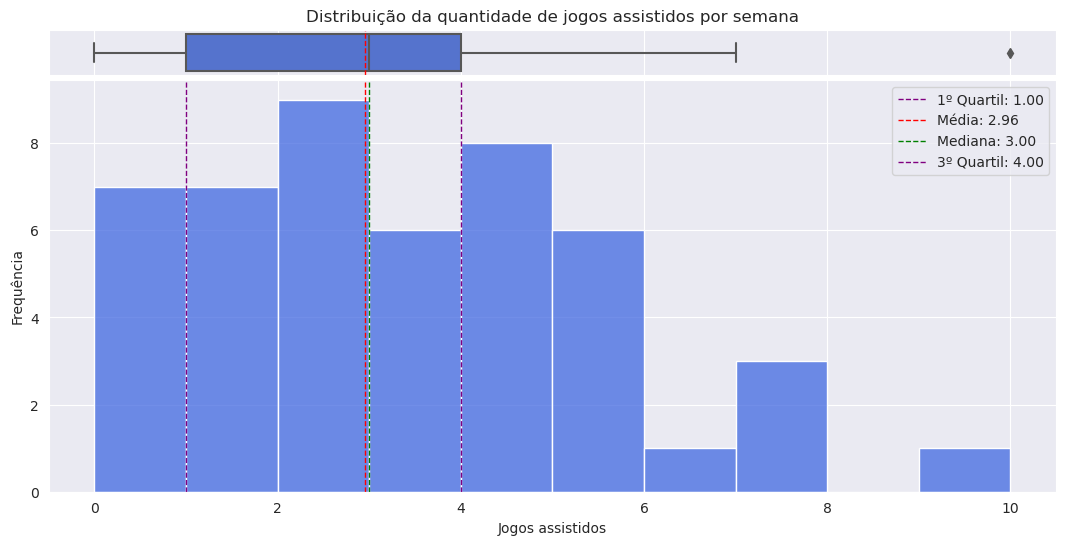

In [140]:
histbox(dados=nba, 
        coluna='jogos_assistidos', 
        title='Distribuição da quantidade de jogos assistidos por semana', 
        xlabel='Jogos assistidos', 
        color='royalblue',
        size=(13,6))

## Plataforma Favorita

 __A ESPN foi eleita a plataforma favorita__ entre os que responderam ao formulário. Na frente da plataforma da Amazon (Prime Video) e do pay-per-view oficial da NBA (NBA League Pass). A ESPN tem um grande papel na divulgação da liga no Brasil, sendo nos últimos anos o principal canal para a transmissão de jogos dos playoffs no país. Recentemente, o Prime Video surgiu como uma alternativa para as transmissões dos jogos, tratando a NBA como um de seus principais produtos. Os aspectos citados talvez possam explicar a popularidade entre essas duas plataformas.

In [141]:
plataforma = tabela_frequencias(nba, 'plataforma_fav')
plataforma

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
plataforma_fav,,,,
ESPN,18,0.375000,18,0.375000
Prime Video,12,0.250000,30,0.625000
NBA League Pass,10,0.208333,40,0.833333
Youtube - Canal NBA Brasil,5,0.104167,45,0.937500
SporTV,2,0.041667,47,0.979167
Outro,1,0.020833,48,1.000000


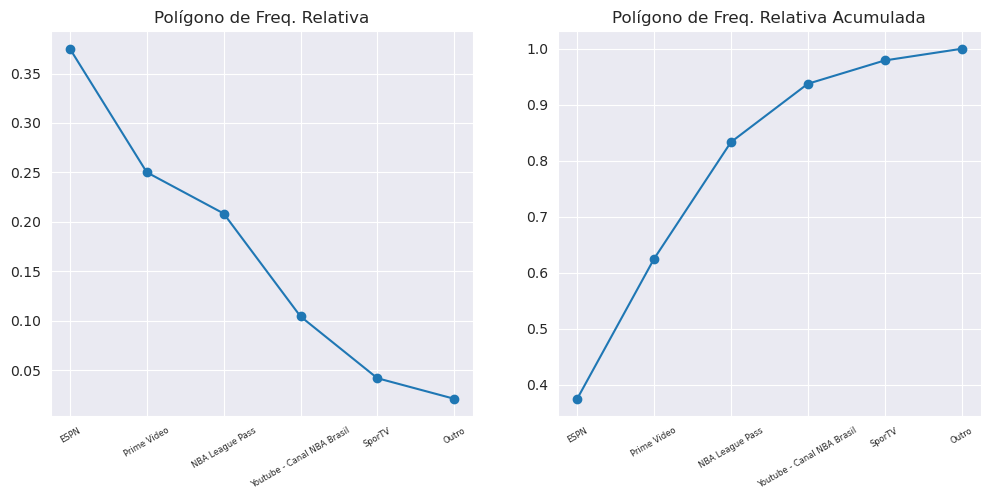

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax[1].plot(plataforma.index, plataforma['Freq. Rel. Acumulada'], '-o')
ax[1].set_title('Polígono de Freq. Relativa Acumulada')
ax[1].set_xticks(plataforma.index)
ax[1].set_xticklabels(plataforma.index, rotation=30, fontsize=6)

ax[0].plot(plataforma.index, plataforma['Freq. Relativa'], '-o')
ax[0].set_title('Polígono de Freq. Relativa')
ax[0].set_xticks(plataforma.index)
ax[0].set_xticklabels(plataforma.index, rotation=30, fontsize=6)

plt.show()

## Apostas

A maior parte das pessoas que responderam ao formulário informaram que têm o costume de apostar em partidas da liga americana de basquete. A quantia mais apostada é a menor faixa de valor (R\\$ 10,00 e R\\$ 24,99), entretanto, há um número relativamente alto de pessoas que apostam mais de R\\$ 100,00 por mês. 

In [143]:
tabela_frequencias(nba, 'aposta_mes')

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
aposta_mes,,,,
"R\$ 10,01 a R\$ 24,99",8,0.32,8,0.32
"Mais de R\$ 100,00",7,0.28,15,0.60
"R\$ 25,00 a R\$ 49,99",6,0.24,21,0.84
"R\$ 50,00 a R\$ 74,99",3,0.12,24,0.96
"R\$ 75,00 a R\$ 100,00",1,0.04,25,1.00


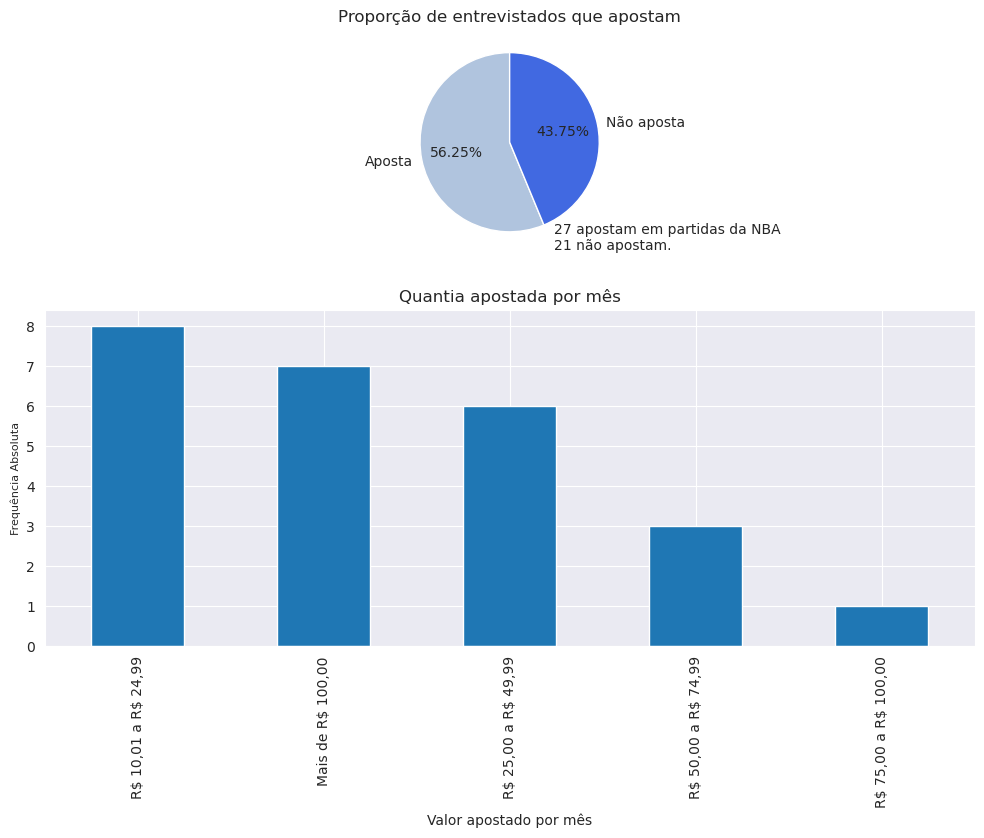

In [144]:
apostadores = nba.aposta.dropna().value_counts()[0]
nao_apostadores = nba.aposta.dropna().value_counts()[1]

text = f'{apostadores} apostam em partidas da NBA\n{nao_apostadores} não apostam.'

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,8), gridspec_kw={'height_ratios': (0.4, 0.6)})
nba['aposta_mes'].value_counts().plot(kind='bar', ax=ax[1], width=0.5)
ax[1].set_title('Quantia apostada por mês')
ax[1].set_xlabel('Valor apostado por mês')
ax[1].set_ylabel('Frequência Absoluta', fontsize=8)

ax[0].pie(nba['aposta'].value_counts(), 
        labels=['Aposta', 'Não aposta'], 
        autopct='%1.2f%%', 
        startangle=90, 
        colors=['lightsteelblue', 'royalblue'])
ax[0].set_title('Proporção de entrevistados que apostam')
ax[0].text(0.5,-1.2, text)

plt.show()

## NBB

A maioria dos respondentes (29) disseram não acompanhar a liga nacional de basquete do Brasil, parcela que representa 60% da amostra. 19 responderam acompanhar, representando cerca de 40%.

In [145]:
tabela_frequencias(nba, 'nbb')

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
nbb,,,,
Não,29,0.604167,29,0.604167
Sim,19,0.395833,48,1.000000


# Popularidade dos times e jogadores

## Time com mais torcedores
A NBA, composta por 30 times, é dividida em duas conferências: a Conferência Leste e a Conferência Oeste. Cada conferência é subdividida em três divisões. Times icônicos como o Los Angeles Lakers, Boston Celtics e Chicago Bulls têm uma rica história de sucesso e numerosos títulos. A diversidade de estilos de jogo e estratégias, junto com a presença de jogadores talentosos de todo o mundo, faz da NBA uma liga dinâmica e emocionante.

O __Golden State Warriors é a equipe com mais torcedores__ na amostra obtida. Lakers aparece como a segunda franquia com mais torcedores na pesquisa com 6 torcedores. Celtics, Bucks e Bulls aparecem empatados em terceiro e 5 pessoas relataram não possuir um time favorito. 

Nos últimos anos, o Golden State Warriors consolidou-se como uma das equipes mais dominantes da NBA. Sob a liderança do técnico Steve Kerr e impulsionados pelas atuações brilhantes de Stephen Curry, Klay Thompson e Draymond Green, os Warriors conquistaram títulos da NBA em 2015, 2017, 2018 e 2022. A equipe é conhecida por seu estilo de jogo dinâmico, baseado em arremessos de longa distância e movimentação rápida da bola. Apesar de enfrentar desafios com lesões e mudanças no elenco, os Warriors mantiveram-se competitivos, retornando ao topo com a vitória nas finais de 2022, demonstrando resiliência e a profundidade de seu talento.

<center><img src='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbG9hZjdod2p0cnNtNW80YmJ3NnhleDFqd254YnlocDE2eHBsbWhwNyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/3o7budlynEJy4aMOre/giphy.gif' width='150px'></center>


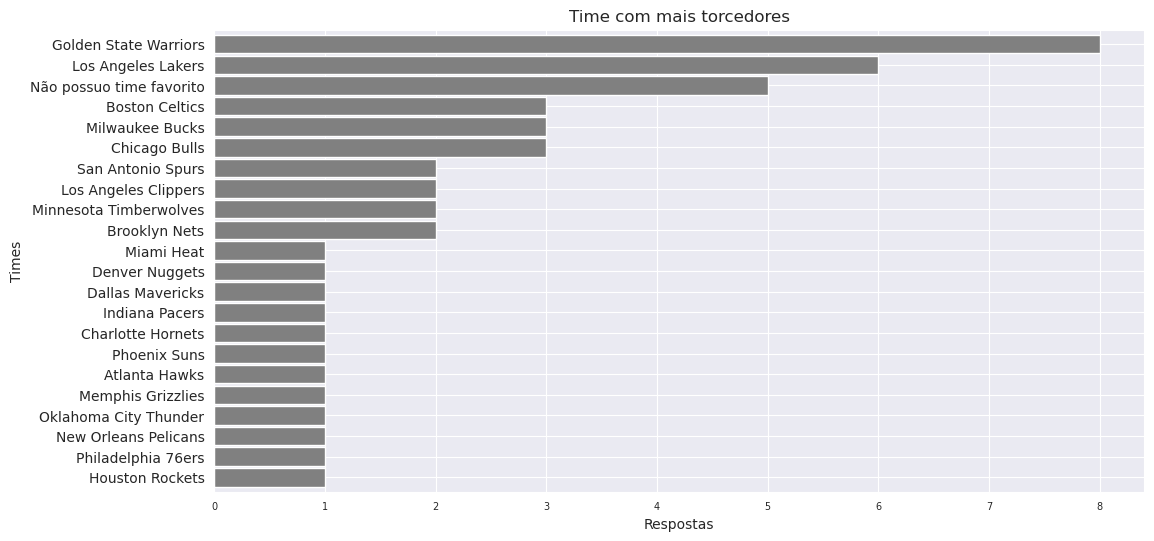

In [146]:
# Gráfico da frequência de resposta de cada equipe 
equipes = nba['equipe'].value_counts().sort_values()
plt.figure(figsize=(12,6))

fig = equipes.plot(kind='barh', color='grey', width=0.9)
plt.title('Time com mais torcedores')
plt.ylabel('Times')
plt.xlabel('Respostas')
plt.xticks(fontsize=7)
plt.show()

## Jogador mais popular


__Stephen Curry é o jogador mais popular__ entre os respondentes da pesquisa com uma margem relativamente boa para os demais atletas da lista. Em seguinda vem LeBron James com 6 votos; Ja Morant, Giannis e Tatum aparecem empatados com 3 respostas. A opção 'Outro' também teve um número considerável de respostas indicando que o jogador favorito não estava listado entre as opções.

Vale destacar que os dois atletas com mais respostas são das equipes mais populares, inclusive seguindo a mesma ordem.

In [147]:
tabela_frequencias(nba, 'jogador_fav')

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
jogador_fav,,,,
Stephen Curry,14,0.291667,14,0.291667
Outro,6,0.125000,20,0.416667
LeBron James,6,0.125000,26,0.541667
Jayson Tatum,3,0.062500,29,0.604167
Giannis Antetokounmpo,3,0.062500,32,0.666667
Ja Morant,3,0.062500,35,0.729167
Trae Young,2,0.041667,37,0.770833
Kevin Durant,2,0.041667,39,0.812500
Luka Doncic,2,0.041667,41,0.854167


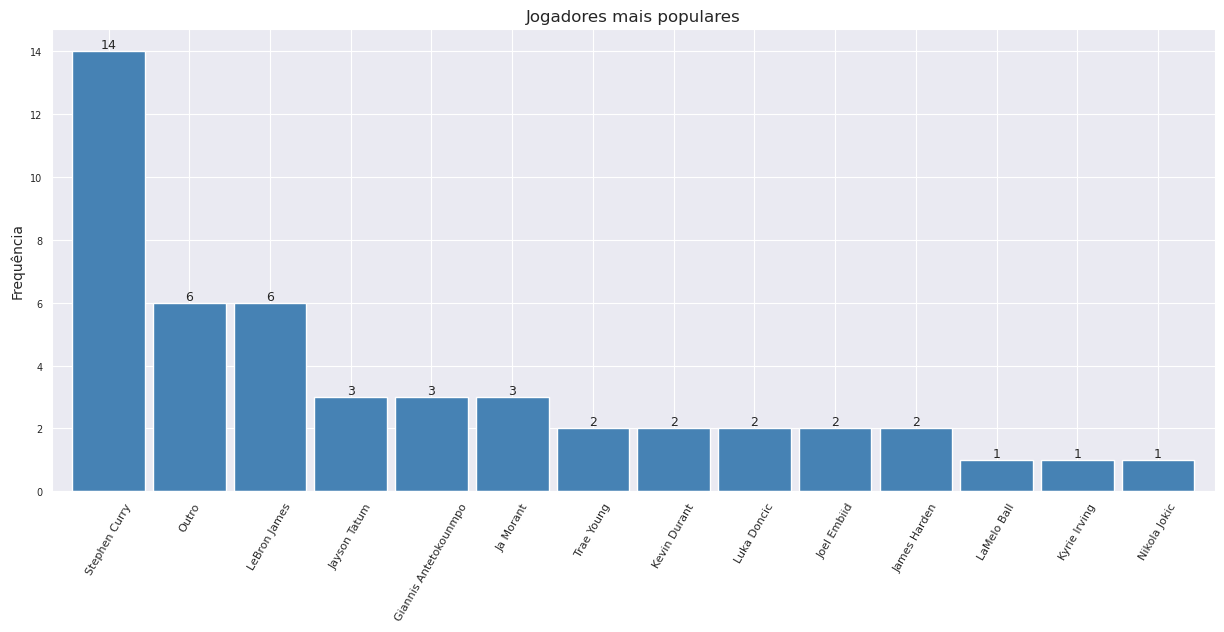

In [148]:
# Gráfico dos jogadores mais populares 
jogadores_populares = nba['jogador_fav'].value_counts()

plt.figure(figsize=(15,6))
fig = jogadores_populares.plot(kind='bar', color='steelblue', width=0.9)
fig.bar_label(fig.containers[0], fontsize=9)
plt.title('Jogadores mais populares')
plt.ylabel('Frequência')
plt.xlabel('')
plt.xticks(rotation=60,fontsize=8)
plt.yticks(fontsize=7)
plt.show()

Stephen Curry é amplamente considerado um dos maiores jogadores da NBA e um revolucionário no basquete moderno. Conhecido por suas habilidades excepcionais de arremesso de longa distância, Curry transformou o jogo com sua capacidade de acertar cestas de três pontos de qualquer lugar na quadra. Jogando pelo Golden State Warriors desde 2009, ele conquistou múltiplos títulos da NBA e foi nomeado MVP da liga duas vezes. Sua liderança, carisma e ética de trabalho inspiram jogadores e fãs, e ele continua a quebrar recordes e a redefinir o que é possível no basquete.

<center>
<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaWQyNTl2dzAwZDdxdTdneWZmMjg0bnZvYXZoMXBrdzN0NTMyN2xyMyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/GR1PtZw80QjxltQlw3/giphy.gif" alt="Imagem 1" width="150">
</center>



## O maior da História 🐐
Sobre o debate do maior de todos os tempos, mais da metade dos respondentes da pesquisa apontaram __Michael Jordan como o maior atleta da história da NBA__. Seguido por LeBron James, Kobe Bryant, Magic Johnson, Larry Bird e Bill Russell.

In [149]:
tabela_frequencias(nba, 'goat')

,Freq. Absoluta,Freq. Relativa,Freq. Abs. Acumulada,Freq. Rel. Acumulada
goat,,,,
Michael Jordan,28,0.583333,28,0.583333
LeBron James,12,0.250000,40,0.833333
Kobe Bryant,4,0.083333,44,0.916667
Magic Johnson,2,0.041667,46,0.958333
Larry Bird,1,0.020833,47,0.979167
Bill Russell,1,0.020833,48,1.000000


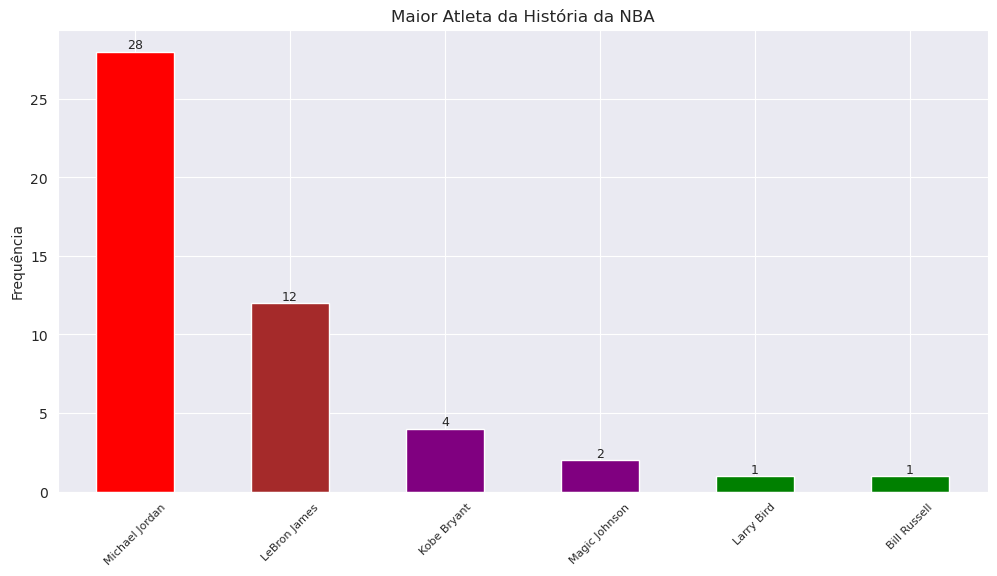

In [150]:
goat = nba['goat'].value_counts()

# Cores representando a equipe de destaque de cada jogador
cores = ['red', 'brown', 'purple', 'purple', 'green', 'green']

plt.figure(figsize=(12,6))
fig = goat.plot(kind='bar',width=0.5, color=cores)
fig.bar_label(fig.containers[0], fontsize=9)
plt.title('Maior Atleta da História da NBA')
plt.ylabel('Frequência')
plt.xlabel('')
plt.xticks(fontsize=8, rotation=45)
plt.show()

Muito fatores podem explicar a escolha de Michael Jordan como o maior atleta da NBA, entre eles a sua dominância na liga ao longo de sua carreira. Jordan colecionou títulos coletivos e individuais na NBA, chegando a conquistar o tricampeonato com o Chicago Bulls(1991-1993), feito nunca antes alcançado na história da liga, teve um período de aposentadoria (1993-1995) do basquete no qual chegou a jogar baseball profissionalmente durante 2 anos e voltou a NBA para conquistar novamente outro tricampeonato pela franquia de Chicago. Seu sucesso nas quadradas alavancou sua linha de tênis da Nike - os Air Jordan - sendo um ícone da moda streetwear, além de diversas aparições em filmes e seriados de TV.

Principais títulos de Jordan:
- 6× Campeão da NBA (1991–1993, 1996–1998)
- 6× MVP das Finais da NBA (1991–1993, 1996–1998)
- 5× MVP da Temporada Regular (1988, 1991, 1992, 1996, 1998)
- 10× Cestinha da NBA (1987–1993, 1996–1998)
- 1× Jogador Defensivo do Ano (1988)
- 10× escolhido para o Melhor Quinteto da NBA (All-NBA Team) (1987–1993, 1996–1998)
- 9× escolhido para o Primeiro time de Defesa da NBA (1988–1993, 1996–1998)
- 14× aparições no NBA All-Star Game (1985–1993, 1996–1998, 2002, 2003)
- 3× MVP do NBA All-Star Game (1988, 1996, 1998)




<center><img src='https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaGRyMTh2Yjh2N3JzZzM3cHVzYnQ5MXRmdno2bDloeGNucnI0OHBzbyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/lrf5jEbnpVUek/giphy.gif' width = '500px'></center>
<center><font size= "1">Jordan vs Lakers</center></font>

# Conclusão
Considerando a dimensão ínfima da amostra em relação à vastidão da população brasileira, esta pesquisa oferece apenas uma visão parcial de alguns fãs que optaram por participar do estudo.

Com base nestes dados, é viável esboçar um perfil típico da amostra: um homem de 23 anos, que assiste a dois jogos por semana na ESPN e pratica basquete. Ele geralmente aposta entre R\\$ 10 e R\\$ 24,99 mensalmente. Torce para o Golden State Warriors, é admirador de Steph Curry e considera Michael Jordan o maior de todos os tempos.

Essa representação é apenas uma síntese do perfil do fã brasileiro da NBA, derivada das análises realizadas, e não necessariamente reflete a diversidade da população do país.